Question 9: Handwritten digit recognition using a Gaussian Generative Model

The solution has the following parts:

1. Load the data
2. Prepare the data by splitting the train data into training set and validation set
3. Create a classifier routine using multinomial_normal function
4. Iterate over several smoothing factor to land at the best smoothing factor on the validation set
5. Apply the best smoothing factor on the test data set and calculate the accuracy
6. Display a few misclassified digits and their posterior probabilities


In [1]:
%cd /Users/Deepthi/Documents/DSE/DSE210 - Statistics and Probability/Day 3/Assignment/Data

/Users/Deepthi/Documents/DSE/DSE210 - Statistics and Probability/Day 3/Assignment/Data


In [29]:
# Import the required libraries
from struct import unpack
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split;
import math 
from scipy.stats import multivariate_normal

### Load the data

In [36]:
# The functions used to import the data and display the digits

# %load loader.py
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
#     plt.show()

In [4]:
# Import the data
train_images, train_labels = loadmnist('train-images-idx3-ubyte','train-labels-idx1-ubyte')
test_images, test_labels = loadmnist('t10k-images-idx3-ubyte','t10k-labels-idx1-ubyte')

### Prepare the data by splitting the train data into training set and validation set

In [5]:
# Split the train data into train and validation sets
train_set,validation_set, train_label, validation_label = train_test_split(train_images,train_labels, test_size=10000, random_state=4)

In [10]:
np.shape(train_set[np.where(train_label==1)])

(5632, 784)

In [11]:
np.shape(train_set)

(50000, 784)

In [12]:
np.shape(train_label)

(50000,)

In [14]:
type(train_label)

numpy.ndarray

### Create a classifier routine using multinomial_normal function

In [6]:
# Create a function to determine the clas probabilities, calculate mean and cov and fit a gaussian
def classifier(c,data_set,label_set):
    label = []
    pd = []
    for i in range(0,10):
        priors = len(train_set[np.where(train_label==i)])/float(len(train_set))
        Mean = train_set[np.where(train_label==i)].mean(0)
        Cov = np.cov((train_set[np.where(train_label==i)]).T)
        Cov = Cov + (c*np.identity(784))
        px = multivariate_normal(mean=Mean, cov=Cov) 
        pd.append(np.log(priors) + px.logpdf(data_set))
    max_prob = np.argmax(pd, axis = 0)
    error = np.sum([i!=j for i,j in zip(max_prob, label_set)])*100/(len(label_set)*1.0)
    accuracy = 100- (np.sum([i!=j for i,j in zip(max_prob, label_set)])*100/(len(label_set)*1.0))
    return c, error, accuracy

### Iterate over several smoothing factor to land at the best smoothing factor on the validation set

To obtain optimum smoothing factor:

1. First try in steps of 1000 to determine the most optimum zone (The zone in which you achieve best accuracy)
2. Repeat the same in steps of 100, 10 and then 1 to land on the most optimum smoothing value

In [7]:
# Go in steps of 1000 from 1000 to 15000:
for c in np.arange(1000,15000,1000):
    print classifier(c,validation_set, validation_label)

(1000, 5.3399999999999999, 94.659999999999997)
(2000, 4.8799999999999999, 95.120000000000005)
(3000, 4.8499999999999996, 95.150000000000006)
(4000, 5.04, 94.959999999999994)
(5000, 5.0499999999999998, 94.950000000000003)
(6000, 5.1100000000000003, 94.890000000000001)
(7000, 5.2000000000000002, 94.799999999999997)
(8000, 5.2599999999999998, 94.739999999999995)
(9000, 5.4000000000000004, 94.599999999999994)
(10000, 5.5800000000000001, 94.420000000000002)
(11000, 5.7699999999999996, 94.230000000000004)
(12000, 6.0300000000000002, 93.969999999999999)
(13000, 6.1399999999999997, 93.859999999999999)
(14000, 6.2400000000000002, 93.760000000000005)


In [8]:
## Consider 2000 to 4000 in steps of 100
for c in np.arange(2000,4000,100):
    print classifier(c,validation_set, validation_label)

(2000, 4.8799999999999999, 95.120000000000005)
(2100, 4.8499999999999996, 95.150000000000006)
(2200, 4.8600000000000003, 95.140000000000001)
(2300, 4.8499999999999996, 95.150000000000006)
(2400, 4.8600000000000003, 95.140000000000001)
(2500, 4.8499999999999996, 95.150000000000006)
(2600, 4.8300000000000001, 95.170000000000002)
(2700, 4.8399999999999999, 95.159999999999997)
(2800, 4.8700000000000001, 95.129999999999995)
(2900, 4.8300000000000001, 95.170000000000002)
(3000, 4.8499999999999996, 95.150000000000006)
(3100, 4.8700000000000001, 95.129999999999995)
(3200, 4.9199999999999999, 95.079999999999998)
(3300, 4.9500000000000002, 95.049999999999997)
(3400, 4.96, 95.040000000000006)
(3500, 4.9400000000000004, 95.060000000000002)
(3600, 4.9900000000000002, 95.010000000000005)
(3700, 5.0099999999999998, 94.989999999999995)
(3800, 5.0499999999999998, 94.950000000000003)
(3900, 5.0300000000000002, 94.969999999999999)


In [11]:
## Consider 2500 to 2700 in steps of 10
for c in np.arange(2500,2700,10):
    print classifier(c,validation_set, validation_label)

(2500, 4.8499999999999996, 95.150000000000006)
(2510, 4.8499999999999996, 95.150000000000006)
(2520, 4.8600000000000003, 95.140000000000001)
(2530, 4.8499999999999996, 95.150000000000006)
(2540, 4.8499999999999996, 95.150000000000006)
(2550, 4.8499999999999996, 95.150000000000006)
(2560, 4.8399999999999999, 95.159999999999997)
(2570, 4.8399999999999999, 95.159999999999997)
(2580, 4.8399999999999999, 95.159999999999997)
(2590, 4.8300000000000001, 95.170000000000002)
(2600, 4.8300000000000001, 95.170000000000002)
(2610, 4.8300000000000001, 95.170000000000002)
(2620, 4.8200000000000003, 95.180000000000007)
(2630, 4.8200000000000003, 95.180000000000007)
(2640, 4.8200000000000003, 95.180000000000007)
(2650, 4.8200000000000003, 95.180000000000007)
(2660, 4.8300000000000001, 95.170000000000002)
(2670, 4.8399999999999999, 95.159999999999997)
(2680, 4.8399999999999999, 95.159999999999997)
(2690, 4.8399999999999999, 95.159999999999997)


In [12]:
## Consider 2610 to 2660 in steps of 1
for c in np.arange(2610,2660,1):
    print classifier(c,validation_set, validation_label)

(2610, 4.8300000000000001, 95.170000000000002)
(2611, 4.8300000000000001, 95.170000000000002)
(2612, 4.8300000000000001, 95.170000000000002)
(2613, 4.8200000000000003, 95.180000000000007)
(2614, 4.8200000000000003, 95.180000000000007)
(2615, 4.8200000000000003, 95.180000000000007)
(2616, 4.8200000000000003, 95.180000000000007)
(2617, 4.8200000000000003, 95.180000000000007)
(2618, 4.8200000000000003, 95.180000000000007)
(2619, 4.8200000000000003, 95.180000000000007)
(2620, 4.8200000000000003, 95.180000000000007)
(2621, 4.8200000000000003, 95.180000000000007)
(2622, 4.8200000000000003, 95.180000000000007)
(2623, 4.8200000000000003, 95.180000000000007)
(2624, 4.8200000000000003, 95.180000000000007)
(2625, 4.8200000000000003, 95.180000000000007)
(2626, 4.8200000000000003, 95.180000000000007)
(2627, 4.8200000000000003, 95.180000000000007)
(2628, 4.8200000000000003, 95.180000000000007)
(2629, 4.8200000000000003, 95.180000000000007)
(2630, 4.8200000000000003, 95.180000000000007)
(2631, 4.8200

In [13]:
## Test the the optimum smoothing value on validation set
print classifier(2613,validation_set, validation_label)

(2613, 4.8200000000000003, 95.180000000000007)


### Apply the best smoothing factor on the test data set and calculate the accuracy

In [14]:
## Apply the classifier on the test data to understand the accuracy
print classifier(2613,test_images, test_labels)

(2613, 4.3099999999999996, 95.689999999999998)


### Display a few misclassified digits and their posterior probabilities

In [75]:
## Modify the function to get the misclassified digits
def classifier2(c,data_set,label_set):
    label = []
    pd = []
    for i in range(0,10):
        priors = len(train_set[np.where(train_label==i)])/float(len(train_set))
        Mean = train_set[np.where(train_label==i)].mean(0)
        Cov = np.cov((train_set[np.where(train_label==i)]).T)
        Cov = Cov + (c*np.identity(784))
        px = multivariate_normal(mean=Mean, cov=Cov) 
        pd.append(np.log(priors) + px.logpdf(data_set))
    max_prob = np.argmax(pd, axis = 0)
    output = zip(max_prob, label_set)
    return output

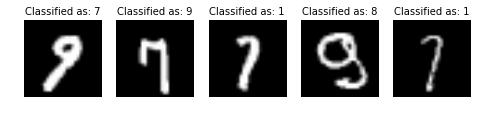

In [83]:
## Disply 5 misclassified digits
get_error = classifier2(2613,test_images, test_labels)
indexes = [i for i,x in enumerate(get_error) if x[0]!=x[1]]

plt.figure(figsize=(8,5))
error = [x[0] for x in get_error if x[0]!=x[1]][:5]
for i in range(0,5):    
    j=i+1
    plt.subplot(1,5,j)
    displaychar(test_images[indexes][i])
    plt.title('Classified as: %i' %error[i],fontsize = 10)

In [77]:
## Modify the function to get the posterior probabilites
def classifier3(c,data_set,label_set):
    label = []
    pd = []
    for i in range(0,10):
        priors = len(train_set[np.where(train_label==i)])/float(len(train_set))
        Mean = train_set[np.where(train_label==i)].mean(0)
        Cov = np.cov((train_set[np.where(train_label==i)]).T)
        Cov = Cov + (c*np.identity(784))
        px = multivariate_normal(mean=Mean, cov=Cov) 
        pd.append(np.log(priors) + px.logpdf(data_set))
    return pd

In [115]:
## Display posterior probabilities
probabilities = classifier3(2613,test_images, test_labels)
probabilities2 = np.vstack(probabilities).T ## Convert to np array
probabilities3 = probabilities2[indexes][:5].T ## Get the 5 misclassified numbers
posterior = pd.DataFrame(probabilities3)
posterior.columns = error
posterior

,7,9,1,8,1
0,-4117.430362,-4146.336160,-4085.897114,-4175.782530,-4038.433573
1,-4093.636764,-4209.643728,-3944.258061,-4508.859618,-3939.713184
2,-4064.229417,-4127.645399,-4012.276470,-4123.686823,-4016.491972
3,-4055.283783,-4081.336775,-4025.623356,-4118.177712,-4006.003211
4,-4049.941278,-4019.943563,-3997.440303,-4136.515091,-3979.879773
5,-4094.544227,-4068.892838,-4062.439011,-4121.957813,-4024.308730
6,-4204.697137,-4213.617167,-4106.876718,-4302.838998,-4045.429547
7,-3980.364376,-3978.539522,-3953.658101,-4229.448893,-3948.761389
8,-4012.334025,-4066.604205,-3987.437770,-4087.108364,-3992.723826
9,-3986.706096,-3976.656389,-3978.935285,-4118.596574,-3950.305978
